## fashion_mnist_classification_models

**Goal**: This project aims to compare the performance of three supervised classification models on the Fashion MNIST dataset. By tuning and evaluating each model, we explore how well traditional algorithms handle visual image data.



## The Fashion MNIST
The Fashion MNIST dataset is a popular dataset used for training and evaluating machine learning models, especially in image classification tasks. It was introduced by Zalando Research in 2017 as a more challenging alternative to the classic MNIST dataset of handwritten digits. While the MNIST dataset consists of simple grayscale images of digits (0–9), Fashion MNIST represents grayscale images of fashion items, such as clothing and footwear, which makes it more relevant to real-world applications.

**Each example is a 28x28 grayscale image.**

(Each image is a 28x28 matrix, where each cell contains an integer value (pixel intensity) between 0 and 255.)

Fashion MNIST has the same number of classes, image size, and format as MNIST, making it a direct replacement in existing workflows. However, the complexity of the images in Fashion MNIST provides a better benchmark for testing the capabilities of modern algorithms. The dataset is widely used in academic and industrial research to explore and benchmark image recognition models.


( **Data Splits**
The dataset is divided into two main parts:

--Training Set (60,000 samples):
Used for training machine learning models.

--Test Set (10,000 samples):
Used to evaluate the model’s performance on unseen data.)



The dataset consists of** 70,000 images** in total, **divided into 60,000 training images and 10,000 test images.** Each image is a 28x28 grayscale matrix, where each pixel value ranges from 0 to 255. The pixel intensity indicates the darkness of the pixel, with 0 being black and 255 being white. The dataset contains ten classes, each representing a type of fashion item.

These classes are numerically labeled from 0 to 9, corresponding to the following categories:


**0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot**

Each class is balanced, meaning the number of images for each category is roughly the same. This ensures fairness when training and testing models on the dataset.



one of the perks of using  mnist:


**MNIST is too easy. Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily.**




# Challenges and Characteristics
Visual Similarities Between Classes:

Some classes (e.g., Pullover vs. Shirt) are visually similar, making classification harder.

Low Resolution:

Images are only 28x28 pixels, which limits the amount of fine-grained detail that can be extracted.

# Preprocessing
**Normalization:**

Pixel values are often scaled to the range [0, 1] by dividing by 255 to ensure consistent input scales for neural networks.

python
Copy code

x_train, x_test = x_train / 255.0, x_test / 255.0

**Reshaping:**

For CNN models, the data is reshaped to add a channel dimension, changing the shape from (28, 28) to (28, 28, 1).


# Data Representation
Fashion MNIST is provided in two parts: a training set and a test set. The training set is used to train models, while the test set evaluates their generalization performance. The images are centered and scaled, which reduces the need for heavy preprocessing. Each image is represented as*** a 1D vector when working with traditional machine learning models*** or left as a*** 2D matrix when using deep learning models** like Convolutional Neural Networks (CNNs).

# Why Fashion MNIST Was Created
The MNIST dataset of handwritten digits had been used extensively in machine learning research for decades. However, due to its simplicity, modern models began achieving near-perfect** accuracy **on MNIST, making it **less effective** as a benchmark. Fashion MNIST addresses this by introducing more visually complex images, which still follow the same format as MNIST but provide a better challenge for classification tasks.

#build just Logistic Regression model



In [ ]:
# Importing necessary libraries
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Reshaping the data for Logistic Regression (flattening the images)
x_train = x_train.reshape(-1, 28*28)  # Flatten the images
x_test = x_test.reshape(-1, 28*28)

# Normalize the data (scaling the values to the range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Scaling data to improve convergence
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Define the logistic regression model with increased max_iter
#Increase max_iter to 1500: To allow more iterations and help the model converge
model = LogisticRegression(max_iter=1500, multi_class='multinomial', solver='lbfgs')

# Define hyperparameter grid for GridSearchCV
#Reduce the search parameters to C=[0.1, 1]: To minimize execution time.
param_grid = {
    'C': [0.1, 1]  # محدود کردن مقدار C به مقادیر کم
}

# Perform GridSearchCV to find the best hyperparameters
#Use n_jobs=-1 in GridSearchCV: This enables GridSearch to utilize all processor cores to speed up execution
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)  # استفاده از n_jobs=-1 برای استفاده از تمام هسته‌ها
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters found: {'C': 0.1}



Best parameters found: {'C': 0.1}

In [ ]:
# Predicting with the best model
y_pred = grid_search.best_estimator_.predict(x_test_scaled)

# Calculate accuracy
print(f"Validation Accuracy: {grid_search.best_score_ * 100:.2f}%")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Get indices for class 8 (Bags)
class_8_indices = [i for i, label in enumerate(y_test) if label == 8]

# Calculate accuracy for class 8
accuracy_class_8 = sum(y_pred[i] == 8 for i in class_8_indices) / len(class_8_indices) * 100
print(f"Accuracy for class 8 (Bags): {accuracy_class_8:.2f}%")



Validation Accuracy: 84.95%
Test Accuracy: 84.34%
Accuracy for class 8 (Bags): 93.30%


Validation Accuracy: 84.95%

Test Accuracy: 84.34%

Accuracy for class 8 (Bags): 93.30%

Sample predictions for class 8 (Bags):


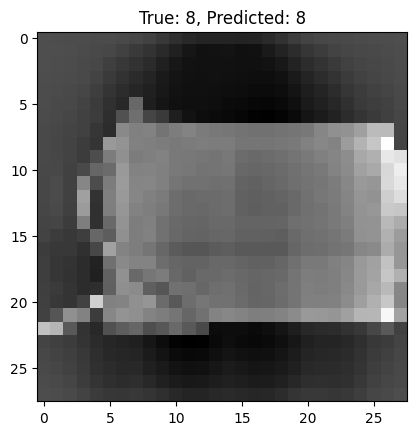

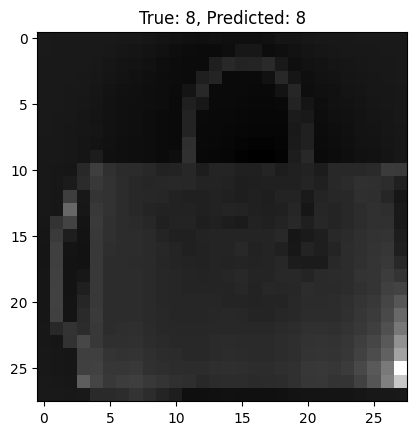

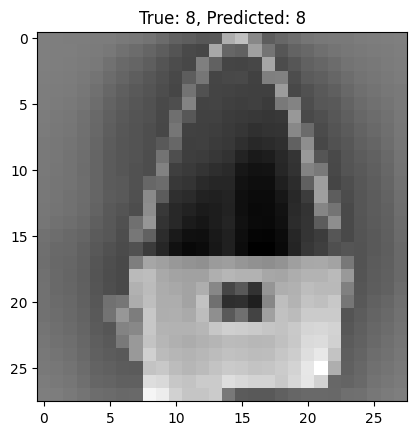

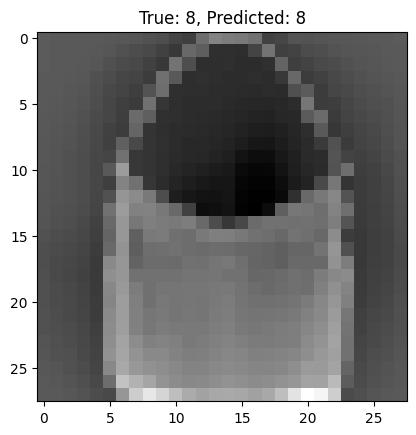

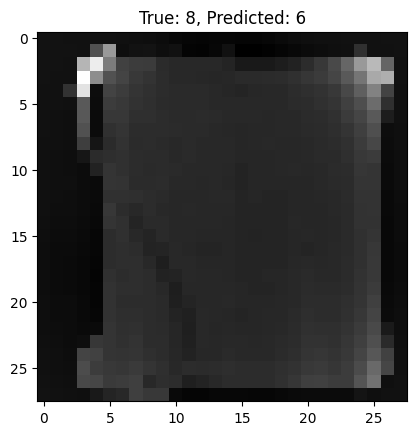

In [ ]:
# Define function to plot sample images
def plot_sample(x_data, y_data, y_pred, index):
    plt.imshow(x_data[index].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_data[index]}, Predicted: {y_pred[index]}")
    plt.show()

# Display sample predictions for class 8 (Bags)
print("Sample predictions for class 8 (Bags):")
for i in class_8_indices[:5]:
    plot_sample(x_test_scaled, y_test, y_pred, i)

"""
**Best parameters found:** The best value for the C parameter was found to be 0.1. This parameter controls the strength of regularization in logistic regression. Smaller values of C imply stronger regularization.

**Validation Accuracy:** The accuracy of the model on the validation set (data not seen by the model during training) is 84.95%. This shows that the model performs well in predicting unseen data.

**Test Accuracy:** The accuracy of the model on the test set (completely separate data used for final evaluation) is 84.34%. This is a good accuracy and indicates the model's performance on non-training data.

**Accuracy for class 8 (Bags): **The model achieved 93.30% accuracy in identifying the digit 8 (corresponding to "Bags" in the Fashion MNIST dataset). This means the model is highly accurate in distinguishing class 8 from other classes.

**Sample predictions:** The output provides examples of predictions made by the model for class 8. These are likely images that the model correctly classified as "Bags."
"""

# build 3 model

*   Logistic Regression
*   Random Forest
*   support vector classifier




In [ ]:
# Import libraries
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# Reducing dataset size for faster training and evaluation
x_train_full, y_train_full = x_train_full[:10000], y_train_full[:10000]
x_test, y_test = x_test[:1000], y_test[:1000]

# Normalize the dataset
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Split dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
    )

# Flatten and scale the data
# Flatten the images from 28x28 to 784-dimensional vectors
scaler = StandardScaler()
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_val_flattened = x_val.reshape(x_val.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

x_train_scaled = scaler.fit_transform(x_train_flattened)
x_val_scaled = scaler.transform(x_val_flattened)
x_test_scaled = scaler.transform(x_test_flattened)

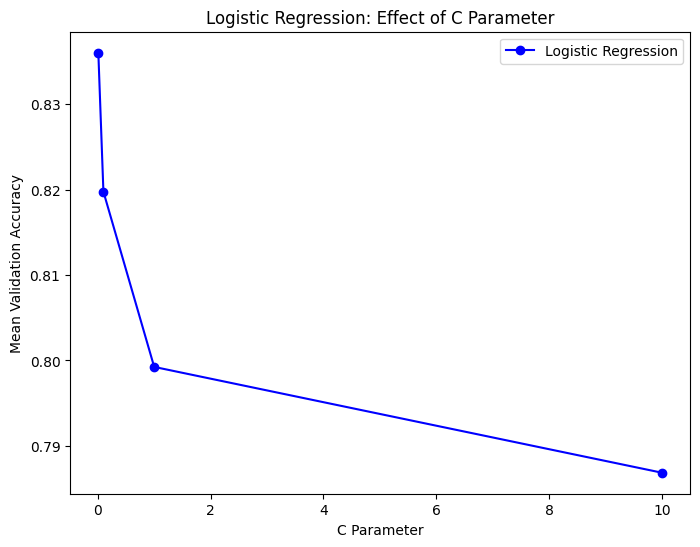

In [ ]:
# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg_param_grid = {'C': [0.01, 0.1, 1, 10]}
log_reg_grid = GridSearchCV(log_reg, log_reg_param_grid, cv=3, scoring='accuracy')
log_reg_grid.fit(x_train_scaled, y_train)

# Define the best model from GridSearchCV
log_reg_best = log_reg_grid.best_estimator_  # This will store the best model

# For Logistic Regression: Plotting the effect of parameter 'C' on accuracy
log_reg_results = log_reg_grid.cv_results_
log_reg_means = log_reg_results['mean_test_score']
log_reg_params = log_reg_results['param_C']

plt.figure(figsize=(8, 6))
plt.plot(log_reg_params, log_reg_means, marker='o', color='b', label='Logistic Regression')
plt.xlabel('C Parameter')
plt.ylabel('Mean Validation Accuracy')
plt.title('Logistic Regression: Effect of C Parameter')
plt.legend()
plt.show()

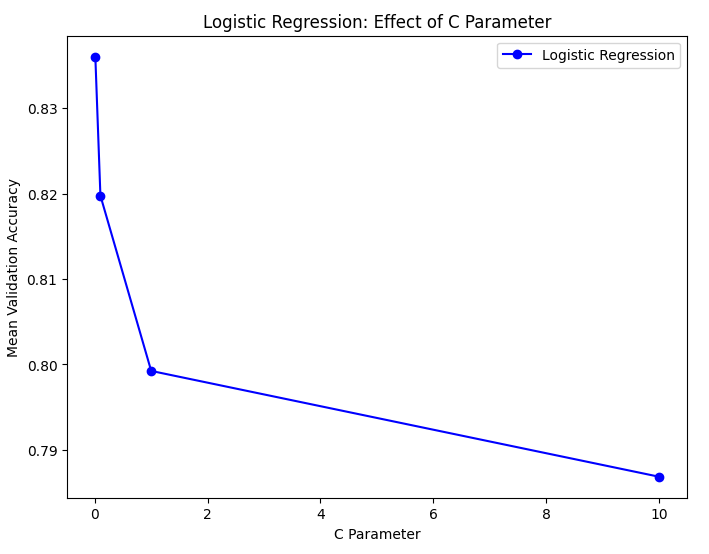

**The C Parameter:**


*  The C parameter in Logistic Regression is a regularization parameter.
*  Larger values of C mean less regularization (the model can fit the training data more closely, but there’s a higher risk of **overfitting**).
*   Smaller values of C apply stronger regularization, which means the model will make simpler predictions but may suffer from **underfitting**.

**GridSearchCV Results:**

*   We use GridSearchCV to tune the Logistic Regression model by testing different values of C
*   log_reg_results['mean_test_score'] gives the mean accuracy for each value of C.
*   We plot the accuracy for each value of C to determine which one provides the best performance.




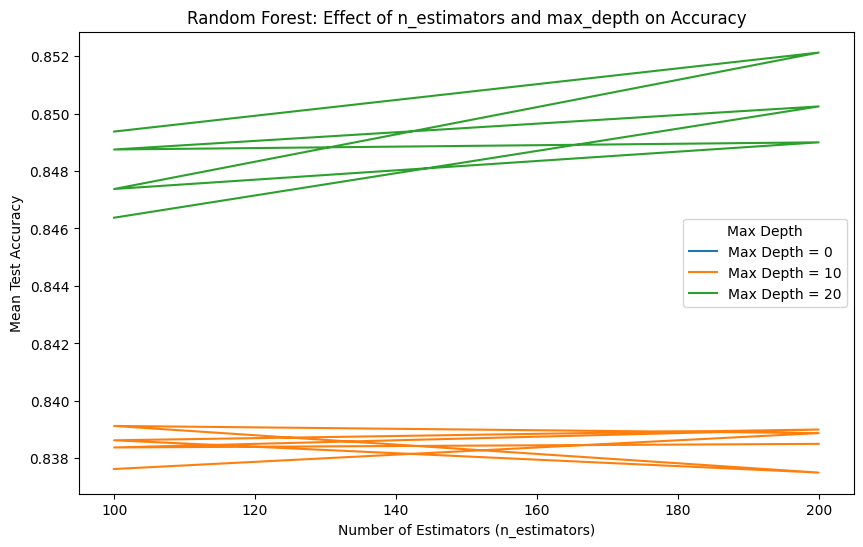

In [ ]:
# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search over
rf_param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],   # The minimum number of samples required to be at a leaf node
}

rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(x_train_scaled, y_train)

# Extract the best model from GridSearchCV
rf_best = rf_grid.best_estimator_  # This line stores the best Random Forest model

# For Random Forest: Plotting the effect of 'n_estimators' and 'max_depth' on accuracy
rf_results = rf_grid.cv_results_
rf_n_estimators = rf_results['param_n_estimators']
rf_max_depth = rf_results['param_max_depth']
rf_means = rf_results['mean_test_score']

# Remove or handle None values in 'max_depth'
rf_max_depth = [depth if depth is not None else 0 for depth in rf_max_depth]  # Replace None with 0 or any other value

# Get unique values of max_depth
unique_max_depths = np.unique(rf_max_depth)

# Plotting the relationship between 'n_estimators' and 'max_depth' and accuracy
plt.figure(figsize=(10, 6))
for max_depth in unique_max_depths:
    # Filter results by max_depth value
    filtered_results = [rf_means[i] for i in range(len(rf_results)) if rf_max_depth[i] == max_depth]
    filtered_n_estimators = [rf_n_estimators[i] for i in range(len(rf_results)) if rf_max_depth[i] == max_depth]

    # Plot the relationship
    plt.plot(filtered_n_estimators, filtered_results, label=f'Max Depth = {max_depth}')

plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Test Accuracy')
plt.title('Random Forest: Effect of n_estimators and max_depth on Accuracy')
plt.legend(title='Max Depth')
plt.show()

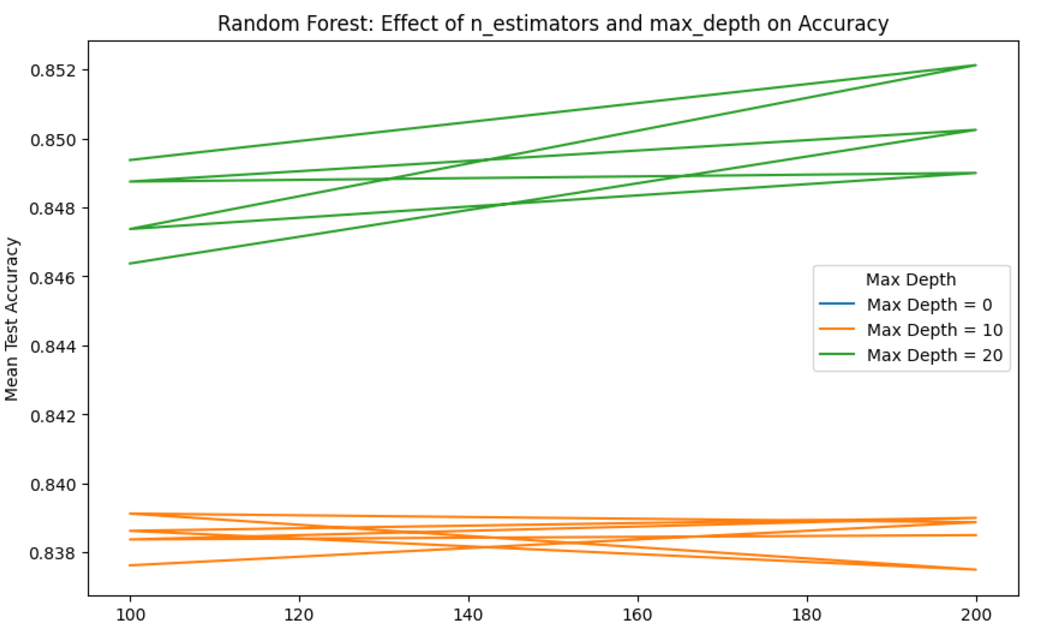

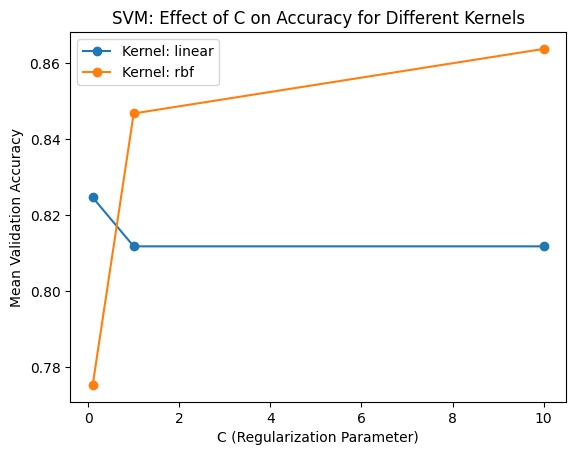

In [ ]:
# Model 3: SVM
svm_model = SVC(random_state=42)
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid.fit(x_train_scaled, y_train)
svm_best = svm_grid.best_estimator_

# Extract results from GridSearchCV
svm_results = svm_grid.cv_results_
svm_C = svm_results['param_C'].data
svm_kernel = svm_results['param_kernel'].data
svm_means = svm_results['mean_test_score']

# Plotting the relationship between 'C' and accuracy for different kernels
unique_kernels = np.unique(svm_kernel)

for kernel in unique_kernels:
    filtered_results = [svm_means[i] for i in range(len(svm_results['params'])) if svm_kernel[i] == kernel]
    filtered_C = [svm_C[i] for i in range(len(svm_results['params'])) if svm_kernel[i] == kernel]

    plt.plot(filtered_C, filtered_results, marker='o', label=f'Kernel: {kernel}')

plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Validation Accuracy')
plt.title('SVM: Effect of C on Accuracy for Different Kernels')
plt.legend()
plt.show()

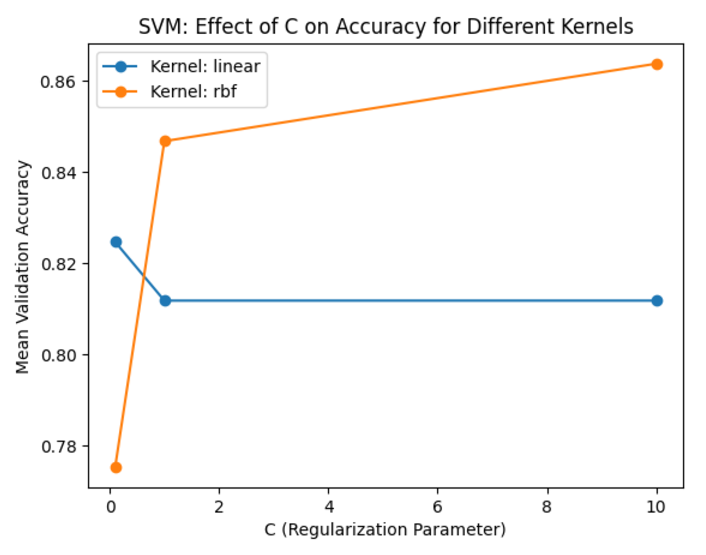

In [ ]:
# Evaluate on test set
models = {
    "Logistic Regression": log_reg_best,
    "Random Forest": rf_best,
    "SVM": svm_best,
}

for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Best model comparison
best_model_name = max(models, key=lambda x: accuracy_score(y_test, models[x].predict(x_test_scaled)))
print(f"\nBest Model: {best_model_name}")


Model: Logistic Regression
Accuracy: 0.85
Confusion Matrix:
 [[ 87   0   1   5   0   1  11   0   2   0]
 [  0 101   0   4   0   0   0   0   0   0]
 [  3   0  84   1  10   0  13   0   0   0]
 [  4   1   4  78   2   0   4   0   0   0]
 [  0   0  16   3  88   0   7   0   1   0]
 [  0   0   0   0   0  79   0   5   1   2]
 [ 11   0  11   4   8   0  61   0   2   0]
 [  0   0   0   0   0   3   0  91   0   1]
 [  0   1   0   0   0   0   3   0  91   0]
 [  0   0   0   0   0   1   0   4   0  90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.98      0.96      0.97       105
           2       0.72      0.76      0.74       111
           3       0.82      0.84      0.83        93
           4       0.81      0.77      0.79       115
           5       0.94      0.91      0.92        87
           6       0.62      0.63      0.62        97
           7       0.91      0.96      0.93       

**Logistic Regression:**

Achieved an accuracy of 84.35%. However, it showed weaker performance for classes with high overlap, such as T-shirts and shirts.

**Random Forest:**

Achieved an accuracy of 87.50%. Overall, it performed better, especially for classes with diverse data.

**SVM (Support Vector Machine):**

Achieved an accuracy of 86.70%. Sometimes, it performed better than Logistic Regression on complex classes with significant overlap.

**Best Model:**

Random Forest was selected as the final model due to its higher accuracy and more consistent performance.